In [17]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [20]:
def wrangle_data(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")

    mask_apt = df["property_type"] == "apartment"

    mask_price = df['price_aprox_usd'] < 400000

    df = df[mask_price & mask_ba & mask_apt]
    
    # Remove outliers using surface_covered_in_m2
    low,high = df['surface_covered_in_m2'].quantile([0.01,0.99])
    mask_area = df['surface_covered_in_m2'].between(low,high)

    df = df[mask_area]

   
    
    return df

In [21]:
df = wrangle_data('buenos-aires-real-estate-1.csv')

df.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
11,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6050060697,-58.4001162302",60000.0,USD,909744.0,60000.0,28.0,28.0,2142.857143,2142.857143,NaN,1.0,NaN,http://once.properati.com.ar/zz0q_venta_depart...
20,sell,apartment,|Argentina|Capital Federal|San Nicolás|,"-34.603898,-58.378617",69000.0,USD,1046205.6,69000.0,NaN,22.0,NaN,3136.363636,23.0,2.0,NaN,http://san-nicolas.properati.com.ar/rnju_venta...


In [22]:
mask_price = df['price_aprox_usd'] < 400000

Text(0.5, 1.0, 'Distribution of Surface Covered in m2 for Apartments in Capital Federal under $400,000')

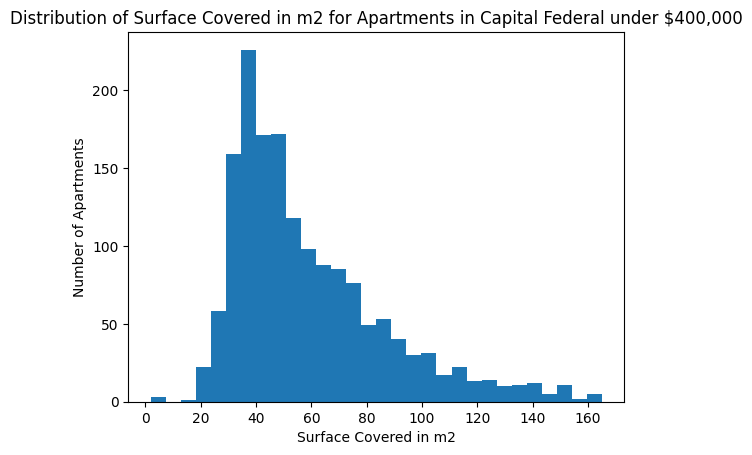

In [23]:
plt.hist(df["surface_covered_in_m2"], bins=30)
plt.xlabel("Surface Covered in m2")
plt.ylabel("Number of Apartments")
plt.title("Distribution of Surface Covered in m2 for Apartments in Capital Federal under $400,000")

In [24]:
df.describe()["surface_covered_in_m2"]

count    1602.000000
mean       59.023720
std        27.874385
min         2.000000
25%        38.000000
50%        50.000000
75%        72.750000
max       165.000000
Name: surface_covered_in_m2, dtype: float64

Text(0.5, 1.0, 'Surface Covered vs Price for Apartments in Capital Federal under $400,000')

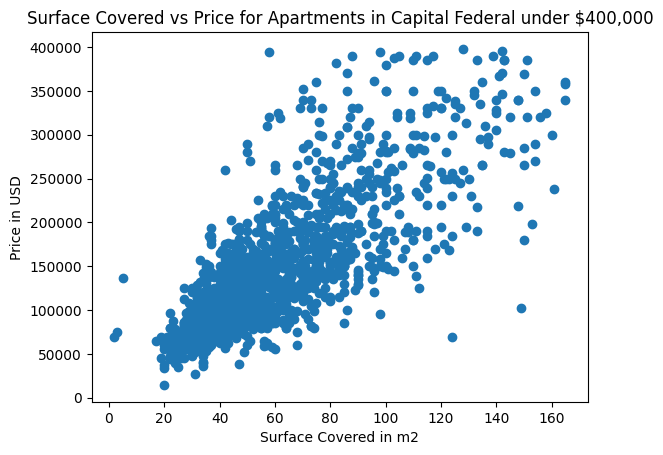

In [25]:
plt.scatter(df["surface_covered_in_m2"], df["price_aprox_usd"]) 
plt.xlabel("Surface Covered in m2")
plt.ylabel("Price in USD")
plt.title("Surface Covered vs Price for Apartments in Capital Federal under $400,000")
